In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols
import seaborn as sns

# seed=45
# np.random.seed(seed)
pd.options.mode.chained_assignment = None 


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


O mínimo da coluna_x é 0.5 e o máximo 9.0
O mínimo da coluna_y é 0.4886312110326798 e o máximo 10.75759357704997


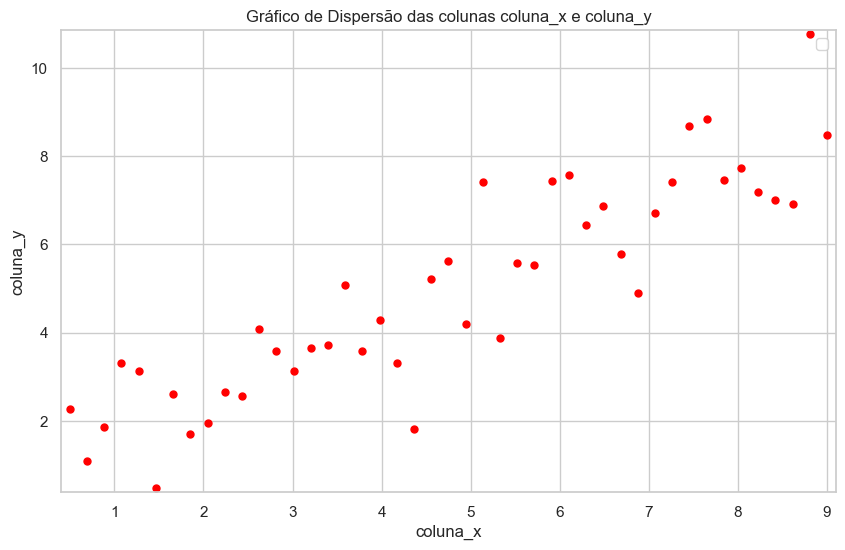

Número de pontos onde x é Positivo: 45
Número de pontos onde x é Negativo: 0


In [4]:
# Definindo a semente aleatória para reprodutibilidade
np.random.seed(0)

# Gerando dados x
x = np.linspace(0.5, 9, 45)

# Gerando dados y como y = x, mas adicionando ruído aleatório
# e alguns pontos deliberadamente fora da reta y = x
y = x + np.random.normal(0, 1, 45)  # Ruído normal

# # Adicionando pontos fora da reta
# outliers_x = [0.8, 5, 1, 3, 6]
# outliers_y = [1.3, 2, 5, 4, 1]
# x = np.append(x, outliers_x)
# y = np.append(y, outliers_y)

# Criando um DataFrame para visualizar os dados
df = pd.DataFrame({'coluna_x': x, 'coluna_y': y})

coluna_x='coluna_x'
coluna_y='coluna_y'

df[coluna_x] = df[coluna_x].astype(float)
df[coluna_y] = df[coluna_y].astype(float)

lista_colunas = [coluna_x,coluna_y]

for coluna in lista_colunas:
    print('O mínimo da {} é {} e o máximo {}'.format(coluna, min(df[coluna]), max(df[coluna])))

min_coluna_x=min(df[coluna_x])
max_coluna_x=max(df[coluna_x])
min_coluna_y=min(df[coluna_y])
max_coluna_y=max(df[coluna_y])

# Especificando tamanho do gráfico
tamanho_figura = (10, 6)
tamanho_bolinha = 25

sns.set(style="whitegrid")
# Ajustando o tamanho da figura antes de qualquer comando de plotagem
plt.figure(figsize=tamanho_figura)

# Plotando os pontos com cores diferentes para valores negativos
pontos_positivos = df[df[coluna_x] >= 0]
pontos_negativos = df[df[coluna_x] < 0]

# plt.scatter(pontos_positivos[coluna_x], pontos_positivos[coluna_y], color='blue', label='Pontos onde x é Positivos',s=tamanho_bolinha)
# plt.scatter(pontos_negativos[coluna_x], pontos_negativos[coluna_y], color='red', label='Pontos onde x é Negativos',s=tamanho_bolinha)
plt.scatter(df[coluna_x], df[coluna_y], color='red',s=tamanho_bolinha)

# Adicionando legenda
plt.legend()

# Adicionando rótulos e título
plt.xlabel(coluna_x)
plt.ylabel(coluna_y)
plt.title('Gráfico de Dispersão das colunas {} e {}'.format(coluna_x,coluna_y))

# Definindo limites dos eixos X e Y
plt.xlim(min_coluna_x-0.1, max_coluna_x+0.1)
plt.ylim(min_coluna_y-0.1, max_coluna_y+0.1)
#plt.ylim(0.99, 1.01)
# Exibindo o gráfico
plt.show()

# Obtendo o número de pontos em cada categoria
num_pontos_positivos = len(pontos_positivos)
num_pontos_negativos = len(pontos_negativos)

print(f'Número de pontos onde x é Positivo: {num_pontos_positivos}')
print(f'Número de pontos onde x é Negativo: {num_pontos_negativos}')


Solução encontrada:
[[0.91029574]
 [0.85405695]]


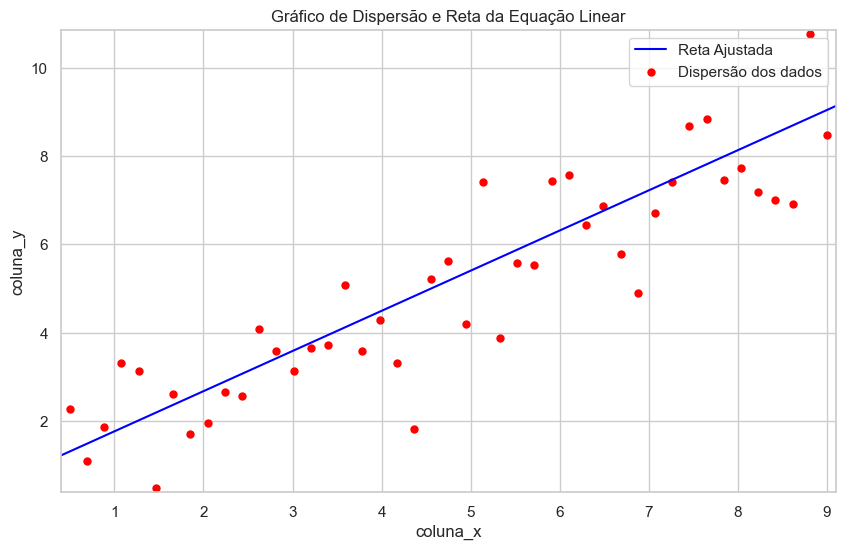

In [8]:
# Definindo variáveis simbólicas
alpha, beta = symbols('alpha beta')

# Criando a matriz NumPy conforme a descrição
coluna_1 = np.ones((len(df), 1))  # Coluna de 1s
coluna_2 = df[coluna_x].values.reshape(-1, 1)  # Valores da coluna 'Coluna_2'

# Concatenando as colunas para formar a matriz
matriz_A = np.hstack((coluna_1, coluna_2))

# Definindo a matriz x como variáveis simbólicas
matriz_x = np.array([[alpha],
                     [beta]])

coluna_b = df[coluna_y].values.reshape(-1, 1)
matriz_b = np.array(coluna_b)

matriz_A_transposta = matriz_A.T

produto_At_A = np.dot(matriz_A_transposta, matriz_A)
#produto_At_A

produto_At_b = np.dot(matriz_A_transposta, matriz_b)
#produto_At_b


# Verifique se a matriz A é invertível (se for uma matriz quadrada)
if produto_At_A.shape[0] == produto_At_b.shape[0]:
    # Tente resolver o sistema Ax = b
    try:
        vetor_x = np.linalg.solve(produto_At_A, produto_At_b)
        print("Solução encontrada:")
        print(vetor_x)
        alpha = float(vetor_x[0, 0])
        b = float(vetor_x[1, 0])
    except np.linalg.LinAlgError:
        print("A matriz A é singular (não invertível). Não é possível resolver o sistema.")
else:
    print("A matriz A não é quadrada. O sistema pode não ter solução única.")


# Preparando dados para plotagem
x_linha = np.linspace(df[coluna_x].min() - 0.1, df[coluna_x].max() + 0.1, 100) 
reta_avaliada = alpha * x_linha + b

# Plotagem
plt.figure(figsize=(10, 6))
plt.plot(x_linha, reta_avaliada, label='Reta Ajustada', color='blue')
plt.scatter(df[coluna_x], df[coluna_y], color='red',s=tamanho_bolinha,label='Dispersão dos dados')
plt.legend()
plt.xlabel(coluna_x)
plt.ylabel(coluna_y)
plt.title('Gráfico de Dispersão e Reta da Equação Linear')

# Definindo limites dos eixos X e Y
plt.xlim(df[coluna_x].min() - 0.1, df[coluna_x].max() + 0.1)
plt.ylim(df[coluna_y].min() - 0.1, df[coluna_y].max() + 0.1)
#plt.xlim(min_coluna_x-0.1, max_coluna_x+0.1)
#plt.ylim(min_coluna_y-0.1, max_coluna_y+0.1)
plt.show()


In [9]:
import numpy as np
import matplotlib.pyplot as plt

a = 1
b = 1
c = 1
learning_rate = 0.0001
j = 0

for j in range(10000):
    anterior_a = a
    anterior_b = b
    anterior_c = c
    y_pred = a * (np.tanh(b * df[coluna_x] + c))
    
    grad_a = 2 * np.sum((y_pred - df[coluna_y]) * np.tanh(b * df[coluna_x] + c))
    #print(grad_a)
    grad_b = 2 * np.sum((y_pred - df[coluna_y]) * ((1 / np.cosh(b * df[coluna_x] + c)) ** 2) * a * df[coluna_x])
    grad_c = 2 * np.sum((y_pred - df[coluna_y]) * ((1 / np.cosh(b * df[coluna_x] + c)) ** 2) * a)
    
    a = a - (learning_rate * grad_a)
    a=float(a)
    b = b - (learning_rate * grad_b)
    b=float(b)
    c = c - (learning_rate * grad_c)
    c=float(c)
    
    if np.all((abs(anterior_a - a) < 0.001) and (abs(anterior_b - b) < 0.001) and (abs(anterior_c - c) < 0.001)):
        print(f'Critério de parada atingido na época {j}')
        break

print("\n(a): {}\n(b): {}\n(c): {}".format(a, b, c))


(a): 7.736413932972162
(b): 0.1600237653378997
(c): -0.022344709247490706


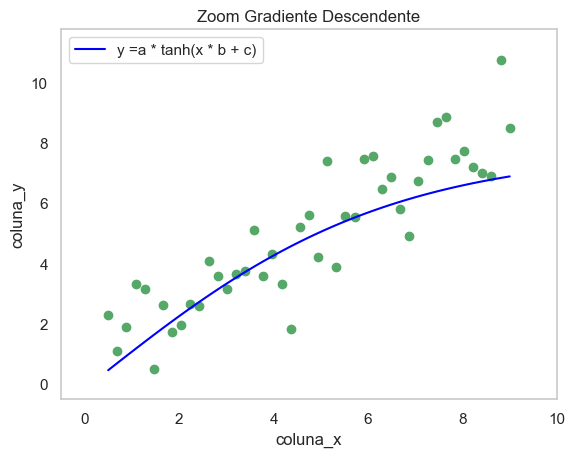

In [10]:
# Definindo nossa curva de ajuste:
x = np.linspace(df[coluna_x].min(), df[coluna_x].max(), 100)
reta_avaliada = (a * np.tanh(x * b + c)) 
plt.scatter(df[coluna_x], df[coluna_y], color='g')
plt.plot(x, reta_avaliada, label='y =a * tanh(x * b + c)', color='blue')
plt.title('Zoom Gradiente Descendente')
plt.xlabel(coluna_x)
plt.ylabel(coluna_y)
plt.grid()
plt.legend()
# Definindo limites dos eixos X e Y
plt.xlim(df[coluna_x].min() - 1, df[coluna_x].max() + 1)
plt.ylim(df[coluna_y].min() - 1, df[coluna_y].max() + 1)
plt.show()

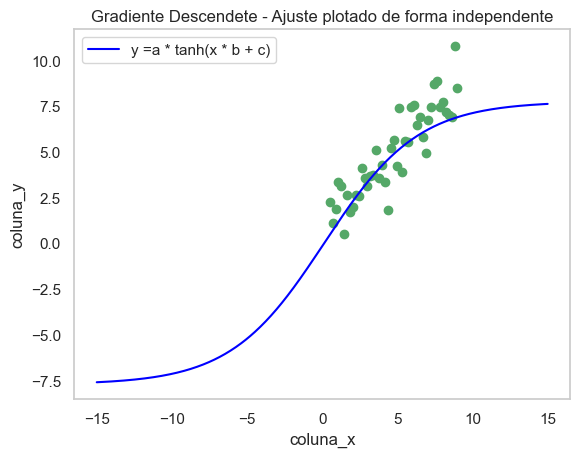

In [11]:
# Função de ajuste
def ajuste_independente(x, a, b, c):
    return a * np.tanh(x * b + c)

# Criando um conjunto de valores de x
x_valores = np.linspace(-15, 15, 500)  # 500 valores igualmente espaçados de -1 a 1

# Calculando os valores de y com a função de ajuste
y_ajuste = ajuste_independente(x_valores, a, b, c)

# Plotando a curva de ajuste
plt.plot(x_valores, y_ajuste, color='blue', label='y =a * tanh(x * b + c)')
plt.scatter(df[coluna_x], df[coluna_y], color='g')
plt.title('Gradiente Descendete - Ajuste plotado de forma independente')
plt.xlabel(coluna_x)
plt.ylabel(coluna_y)
plt.legend()
plt.grid()
plt.show()


In [12]:
# Calculando os valores previstos pela reta avaliada
y_pred = a * np.tanh(df[coluna_x].values * b + c)

# Calculando a diferença entre valores previstos e reais
diferencas = y_pred - df[coluna_y].values

# Calculando o erro total como a soma dos valores absolutos das diferenças
erro_total = np.sum(np.abs(diferencas))

erro_total

44.95917338947014

In [13]:
a1=0.1
b1=0.1
c1=0.1
a2=0.1
b2=0.1
c2=0.1
# learning_rate = 0.0001
# j=0
# for j in range(0,1000):
learning_rate = 0.0001
j = 0

for j in range(10000):
    anterior_a1= a1
    anterior_b1 = b1
    anterior_c1 = c1
    anterior_a2= a2
    anterior_b2 = b2
    anterior_c2 = c2
    y_pred =a1*np.tanh(b1*(a2*np.tanh(b2*df[coluna_x]+c2))+c1) 
    grad_a1 = 2*sum((y_pred - df[coluna_y])*np.tanh(b1*a2/ np.tanh(b2*df[coluna_x]+c2)+c1))
    grad_b1 = 2*sum((y_pred - df[coluna_y])* a1*((1/np.cosh(b1*a2*np.tanh(b2*df[coluna_x]+c2)+c1))**2)*a2*np.tanh(b2*df[coluna_x]+c2))
    grad_c1=2*sum((y_pred - df[coluna_y])*a1*((1/np.cosh(b1*a2*np.tanh(b2*df[coluna_x]+c2)+c1))**2))
    grad_a2 = 2*sum((y_pred - df[coluna_y])*a1*((1/np.cosh(b1*a2*np.tanh(b2*df[coluna_x]+c2)+c1))**2)*b1*np.tanh(b2*df[coluna_x]+c2))
    grad_b2 = 2*sum((y_pred - df[coluna_y])* a1*((1/np.cosh(b1*a2*np.tanh(b2*df[coluna_x]+c2)+c1))**2)*a2*b1*df[coluna_x]*((1/np.cosh(b2*df[coluna_x]+c2))**2))
    grad_c2=2*sum((y_pred - df[coluna_y])*a1*((1/np.cosh(b1*a2*np.tanh(b2*df[coluna_x]+c2)+c1))**2)*a2*b1*((1/np.cosh(b2*df[coluna_x]+c2))**2))
    a1 = a1 - (learning_rate * grad_a1)
    a1=np.longdouble(a1)
    b1 = b1 - (learning_rate * grad_b1)
    b1 = np.longdouble(b1)
    c1 = c1 - (learning_rate * grad_c1)
    c1 = np.longdouble(c1)
    a2 = a2 - (learning_rate * grad_a2)
    a2=np.longdouble(a2)
    b2 = b2 - (learning_rate * grad_b2)
    b2 = np.longdouble(b2)
    c2 = c2 - (learning_rate * grad_c2)
    c2 = np.longdouble(c2)
                                                                                                 
    #if np.all((abs(anterior_a1 - a1) and abs(anterior_b1 - b1) and abs(anterior_c1 - c1) and abs(anterior_a2 - a2) and 
    #           abs(anterior_b2 - b2) and abs(anterior_c2 - c2))<0.001):
    if np.all((abs(anterior_a1 - a1) < 0.0001) and (abs(anterior_b1 - b1) < 0.00001) and (abs(anterior_c1 - c1) < 0.00001 ) and (abs(anterior_a2 - a2) < 0.00001) and 
               (abs(anterior_b2 - b2) < 0.0001) and (abs(anterior_c2 - c2)< 0.00001)):
            print(f'Critério de parada atingido na época {j}')
            break

#0.00000001
    #0.000001
print("\n(a1): {}\n(b1): {} \n(c1): {} \n(a2): {}\n(b2): {} \n(c2): {}".format(a1,b1,c1,a2,b2,c2))

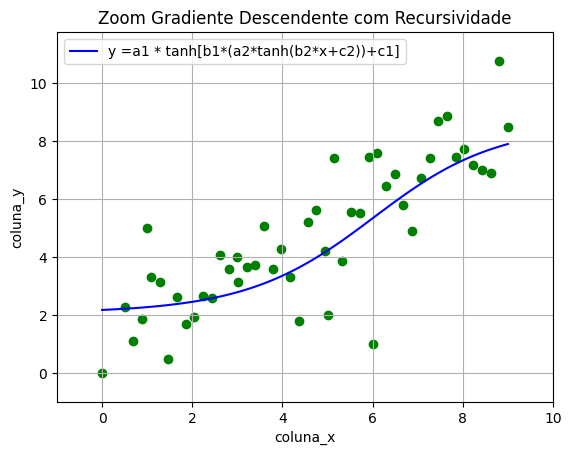

In [10]:
# Definindo nossa curva de ajuste:
x = np.linspace(df[coluna_x].min(), df[coluna_x].max(), 100)
reta_avaliada = (a1*np.tanh(b1*(a2*np.tanh(b2*x+c2))+c1))
plt.scatter(df[coluna_x], df[coluna_y], color='g')
plt.plot(x, reta_avaliada, label='y =a1 * tanh[b1*(a2*tanh(b2*x+c2))+c1]', color='blue')
plt.title('Zoom Gradiente Descendente com Recursividade')
plt.xlabel(coluna_x)
plt.ylabel(coluna_y)
plt.grid()
plt.legend()
# Definindo limites dos eixos X e Y
plt.xlim(df[coluna_x].min() - 1, df[coluna_x].max() + 1)
plt.ylim(df[coluna_y].min() - 1, df[coluna_y].max() + 1)
plt.show()

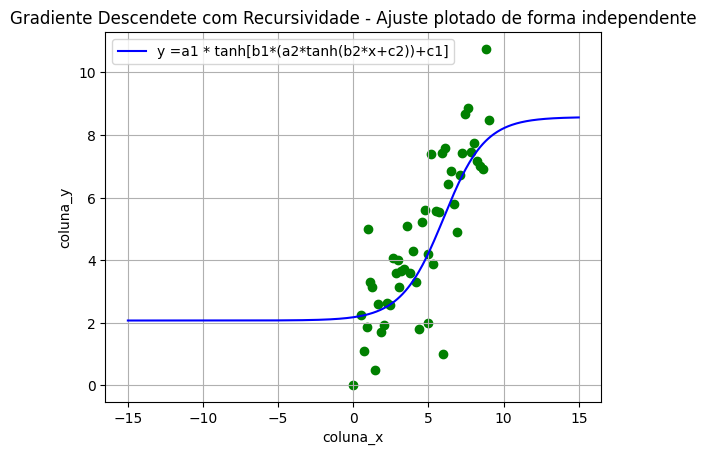

In [11]:
# Função de ajuste
def ajuste_independente(x, a1, b1, c1,a2,b2,c2):
    return a1*np.tanh(b1*(a2*np.tanh(b2*x+c2))+c1)

# Criando um conjunto de valores de x
x_valores = np.linspace(-15, 15, 500)   # 500 valores igualmente espaçados de -1 a 1

# Calculando os valores de y com a função de ajuste
y_ajuste = ajuste_independente(x_valores, a1, b1, c1,a2,b2,c2)

# Plotando a curva de ajuste
plt.plot(x_valores, y_ajuste, color='blue', label='y =a1 * tanh[b1*(a2*tanh(b2*x+c2))+c1]')
plt.scatter(df[coluna_x], df[coluna_y], color='g')
plt.title('Gradiente Descendete com Recursividade - Ajuste plotado de forma independente')
plt.xlabel(coluna_x)
plt.ylabel(coluna_y)
plt.legend()
plt.grid()
plt.show()


In [12]:
# Calculando os valores previstos pela reta avaliada
y_pred_recursividade = a1*np.tanh(b1*(a2*np.tanh(b2*df[coluna_x].values+c2))+c1)

# Calculando a diferença entre valores previstos e reais
diferencas_recursividade = y_pred_recursividade - df[coluna_y].values

# Calculando o erro total como a soma dos valores absolutos das diferenças
erro_total_recursividade  = np.sum(np.abs(diferencas_recursividade))

erro_total_recursividade

55.2860319634681

In [ ]:
a = 0.1
b = 0.1
c = 0.1
learning_rate = 0.00005
j = 0

for j in range(10000):
    anterior_a = a
    anterior_b = b
    anterior_c = c
    y_pred = a * (np.tanh(b * df[coluna_x] + c))
    
    grad_a = 2 * np.sum((y_pred - df[coluna_y]) * np.tanh(b * df[coluna_x] + c))
    #print(grad_a)
    grad_b = 2 * np.sum((y_pred - df[coluna_y]) * ((1 / np.cosh(b * df[coluna_x] + c)) ** 2) * a * df[coluna_x])
    grad_c = 2 * np.sum((y_pred - df[coluna_y]) * ((1 / np.cosh(b * df[coluna_x] + c)) ** 2) * a)
    
    a = a - (learning_rate * grad_a)
    a=float(a)
    b = b - (learning_rate * grad_b)
    b=float(b)
    c = c - (learning_rate * grad_c)
    c=float(c)
    
    if np.all((abs(anterior_a - a) < 0.00005) and (abs(anterior_b - b) < 0.00005) and (abs(anterior_c - c) < 0.00005)):
        print(f'Critério de parada atingido na época {j}')
        break

print("/n(a): {}/n(b): {}/n(c): {}".format(a, b, c))

# Calculando os valores previstos pela reta avaliada
y_pred = a * np.tanh(df[coluna_x].values * b + c)

# Calculando a diferença entre valores previstos e reais
diferencas = y_pred - df[coluna_y].values

# Calculando o erro total como a soma dos valores absolutos das diferenças
erro_total = np.sum(diferencas**2)

print(f'O erro total é de {erro_total}')
      
sns.set_theme(style="whitegrid")
# Definindo nossa curva de ajuste:
x = np.linspace(df[coluna_x].min(), df[coluna_x].max(), 100)
reta_avaliada = (a * np.tanh(x * b + c)) 
plt.scatter(df[coluna_x], df[coluna_y], color='blue')
plt.plot(x, reta_avaliada, label=f'Y =a * tanh(x * b + c)', color='red')
#plt.plot(x, reta_avaliada, label=f'Y ={a * tanh(x * {b + {c)', color='red')
#plt.title('Zoom Gradiente Descendente')
plt.xlabel(coluna_x)
plt.ylabel(coluna_y)
#plt.grid()
plt.legend()
# Definindo limites dos eixos X e Y
plt.xlim(df[coluna_x].min() - 1, df[coluna_x].max() + 1)
plt.ylim(df[coluna_y].min() - 1, df[coluna_y].max() + 1)

plt.savefig("C:/Users/Raquel/OneDrive/Área de Trabalho/Raquel/Mestrado/Capítulos/Capítulo 1/zoom_gradiente_descendente.png")
plt.show()
print('##########################A################################################')

# Função de ajuste
def ajuste_independente(x, a, b, c):
    return a * np.tanh(x * b + c)

# Criando um conjunto de valores de x
x_valores = np.linspace(-15, 15, 500)  # 500 valores igualmente espaçados de -1 a 1

# Calculando os valores de y com a função de ajuste
y_ajuste = ajuste_independente(x_valores, a, b, c)

# Plotando a curva de ajuste
plt.plot(x_valores, y_ajuste, color='red', label=f'Y =a * tanh(x * b + c)')
plt.scatter(df[coluna_x], df[coluna_y], color='blue')
#plt.title('Gradiente Descendete - Ajuste plotado de forma independente')
plt.xlabel(coluna_x)
plt.ylabel(coluna_y)
plt.legend()
##plt.grid()
plt.savefig("C:/Users/Raquel/OneDrive/Área de Trabalho/Raquel/Mestrado/Capítulos/Capítulo 1/gradiente_descendente.png")
plt.show()
